## 1.1. 序論
ゲームレビューの良い評価の投票数と文字数の関係は
ゲームレビューの文字数が少なすぎると中身のないレビューのため投票数が少なくなりやすく、また多すぎても最後まで読む気になりづらく、投票数が少なくなるという非線形の関係になるのではないかと仮説を立てた
この仮説が正しいか検証するためにゲームレビューの良い評価の投票数がレビューの文字数によってどのような関係になっているか、スチームのゲームレビューデータを使用して、重回帰分析によって調査する。

### 1.2.1. データの内容
使用するデータはkaggleで公開されているスチームのユーザーレビューのデータセットからデータ数の削減のためゲーム評価が8以上のものかつレビューの言語が日本語のもののみを抽出したデータである。元のデータはkaggleのプラットフォームから以下のURLより取得した。
https://www.kaggle.com/datasets/kieranpoc/steam-reviews/data
データには7339件のレコードが存在する。1レコードはユーザーが書いたレビューを
意味する。格納されている情報は、ユーザーがレビューを書いたゲームの情報やレビューを書いたユーザーの情報、レビューに対する情報が含まれている。
目的変数にするのは「良いレビューの投票数」という変数名で格納されている、レビューに対する良いレビューと投票した数である。
説明変数は「良いレビューの投票数」と非線形の関係が想定される「レビューの文字数」とその2次の項を変数とする。
       

### 1.2.2. 分析の方法
分析は重回帰モデルによって行った。
説明変数は目的変数との非線形の関係を想定しているため説明変数の2二次の項を目的変数として追加した。

### 1.2.3. 分析モデルの評価
重回帰モデルによる自由度調整済み決定係数は0.273であった、すなわち説明変数の投入によって目的変数の変動の27.3%が説明される。これは、レビューの文字数によって良いレビューかどうかを2割近くで説明できる事を意味する。F検定のp値は0.00であった。すなわち、説明変数の偏回帰係数は少なくとも1つは0でないという事が示されたため、今回の重回帰モデルは適合性があると言える。

残差のヒストグラム、残差プロット、残差のQQプロットをそれぞれ以下に示す。
確認すると正規分布には従っているがQQプロットで正の方向に残差が大きく乖離しているため誤差の正規性の仮定が崩れていると判断できる。

In [6]:
# 必要なモジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.rcParams['font.family'] = 'Meiryo'

In [2]:
df=pd.read_csv("スチーム日本語のレビュー.csv",encoding="utf-8")

In [3]:
df

,Unnamed: 0,レビューid,ゲーム名,所持ゲーム総数,書いたレビュー総数,レビュー対象ゲームの累計プレイ時間,レビュー時点でのプレイ時間,最後にプレイした日,本文,書かれた日時,更新された日時,良いレビューか,良いレビューの投票数,面白い評価数,評価スコア,レビュー対するコメント数,ゲームがスチームで購入されたか,無料か,レビューの文字数,count
0,0,103031914,Battlefield? 2042,0,1,5809,3323,2021-12-02 22:56:22+09:00,話題作だったので先行アクセスでプレイましたが、買ったことを非常に後悔しています。 細かい問...,2021-11-19 17:14:58+09:00,2021-11-19 17:14:58+09:00,0,277,9,0.808188,0,1,0,833,40
1,1,103034198,Battlefield? 2042,2746,35,2658,1020,2022-08-30 22:49:19+09:00,1年後また来てください 最高のBFというものをお見せしますよ,2021-11-19 17:49:09+09:00,2021-11-19 17:49:09+09:00,1,519,446,0.833189,5,1,0,30,40
2,2,103045955,Battlefield? 2042,0,1,2604,874,2021-11-28 01:04:08+09:00,わざわざレビュー書いてネガキャンしたい程度にはクソ,2021-11-19 20:51:41+09:00,2021-11-19 20:51:41+09:00,0,376,94,0.850125,0,1,0,25,40
3,3,103118674,Battlefield? 2042,280,12,3829,575,2023-09-23 16:27:20+09:00,BFのフランチャイズとしては到底評価できない （※コンクエストを野良で遊ぶことがメインの人...,2021-11-20 17:41:27+09:00,2021-11-21 12:37:06+09:00,0,250,6,0.880383,0,1,0,1772,40
4,4,103130448,Battlefield? 2042,0,9,4012,2107,2023-10-26 21:56:14+09:00,①Googleで「Steam 返金」を検索する ②検索結果のSteam返金を選択する ③ペー...,2021-11-20 21:21:30+09:00,2021-11-20 21:21:30+09:00,0,519,118,0.901208,2,1,0,159,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,7334,71127034,雀?,125,137,2531,2530,2020-06-22 17:59:23+09:00,概要 萌え要素を取り入れた麻雀ゲーム。課金による優劣はなく、4人打ち・3人打ちでそれぞれ東南...,2020-06-21 21:58:27+09:00,2021-06-15 00:29:22+09:00,1,57,0,0.848025,0,0,0,802,1
7335,7335,51079008,食用系少女 Food Girls,9636,236,125,58,2019-08-24 23:06:09+09:00,※最後に詳細は書くけど検閲版です。オリジナル版と同様のグラフィックで遊ぶ場合はあるファイルの...,2019-06-06 21:43:40+09:00,2019-06-10 11:18:36+09:00,1,469,55,0.896434,10,1,0,1218,1
7336,7336,59448095,魅魔新妻 Succubus Waifu,0,114,155,51,2020-12-09 04:54:28+09:00,祝！発売3周年！[strike]何故か増えない日本語レビュー！[/strike] わかったら...,2019-12-08 05:50:34+09:00,2022-11-24 00:24:16+09:00,1,67,147,0.800623,0,1,0,1052,1
7337,7337,142618691,魔女的夜宴,1572,17,6,6,2023-07-23 11:25:52+09:00,07/21に発売するとは、理解ってるねぇ… これを書くために購入しました。 [spoil...,2023-07-23 11:39:40+09:00,2023-07-23 17:56:25+09:00,1,47,7,0.843720,0,1,0,179,1


In [5]:
df.columns

Index(['Unnamed: 0', 'レビューid', 'ゲーム名', '所持ゲーム総数', '書いたレビュー総数',
       'レビュー対象ゲームの累計プレイ時間', 'レビュー時点でのプレイ時間', '最後にプレイした日', '本文', '書かれた日時',
       '更新された日時', '良いレビューか', '良いレビューの投票数', '面白い評価数', '評価スコア', 'レビュー対するコメント数',
       'ゲームがスチームで購入されたか', '無料か', 'レビューの文字数', 'count'],
      dtype='object')

In [20]:
df.describe()

,Unnamed: 0,レビューid,所持ゲーム総数,書いたレビュー総数,レビュー対象ゲームの累計プレイ時間,レビュー時点でのプレイ時間,良いレビューか,良いレビューの投票数,面白い評価数,評価スコア,レビュー対するコメント数,ゲームがスチームで購入されたか,無料か,レビューの文字数,count,レビューの文字数^2
count,7339.000000,7.339000e+03,7339.000000,7339.000000,7.339000e+03,7.339000e+03,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7.339000e+03
mean,3669.000000,6.736836e+07,525.539992,46.854476,1.759786e+04,9.096553e+03,0.856247,114.603216,26.373075,0.850578,0.451833,0.799155,0.022210,902.716583,4.940319,1.918583e+06
std,2118.731145,4.171402e+07,1493.882159,88.492490,1.124591e+05,7.153717e+04,0.350863,118.492075,76.049756,0.038672,2.056099,0.400660,0.147376,1050.636319,6.212353,5.513245e+06
min,0.000000,6.523000e+03,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00
25%,1834.500000,3.147011e+07,0.000000,4.000000,3.835000e+02,1.495000e+02,1.000000,55.000000,2.000000,0.819132,0.000000,1.000000,0.000000,217.000000,1.000000,4.708900e+04
50%,3669.000000,5.966916e+07,0.000000,16.000000,1.530000e+03,6.720000e+02,1.000000,78.000000,5.000000,0.841728,0.000000,1.000000,0.000000,581.000000,2.000000,3.375610e+05
75%,5503.500000,1.033130e+08,366.000000,46.000000,5.713500e+03,2.500500e+03,1.000000,129.000000,19.000000,0.875302,0.000000,1.000000,0.000000,1193.500000,5.000000,1.424448e+06
max,7338.000000,1.489685e+08,19244.000000,1129.000000,4.990477e+06,4.405056e+06,1.000000,1743.000000,2598.000000,0.985206,76.000000,1.000000,1.000000,7999.000000,40.000000,6.398400e+07


良い評価とレビューの文字数は短すぎると評価が低くなりまた高すぎても評価が低くなる非線形の関係でないかと仮定
目的変数ｙを良いレビューの投票数
説明変巣ｘをレビューの文字数とレビューの文字数の2次の項
として分析を行うことにした。

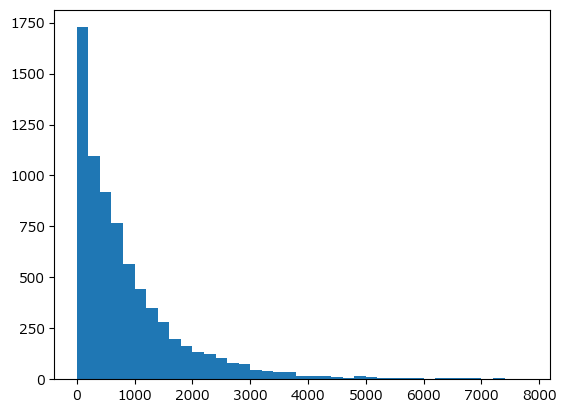

In [ ]:
#レビューの文字数の分布を確認
bin=range(0,8000,200)
plt.hist(df["レビューの文字数"],bins=bin)
plt.show()

In [93]:
f=df[df["レビューの文字数"]<1000]

In [105]:
f["レビューの文字数^2_2"]=f["レビューの文字数"]**2

C:\Users\koyama\AppData\Local\Temp\ipykernel_7772\1494988269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["レビューの文字数^2_2"]=f["レビューの文字数"]**2


In [100]:
g

0       693889
1          900
2          625
4        25281
5         4489
         ...  
7331    272484
7332    366025
7333    627264
7334    643204
7337     32041
Name: レビューの文字数, Length: 5071, dtype: int64

In [3]:
#レビューの文字数の2次の項を作成
df["レビューの文字数^2"]=df["レビューの文字数"]**2

In [116]:
#説明変数と目的変数を代入
y=df["良いレビューの投票数"]
X=df[["レビューの文字数","レビューの文字数^2"]]

In [117]:
model=sm.OLS(y,X)
result=model.fit()

In [118]:

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             良いレビューの投票数   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              1376.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                        0.00
Time:                        13:53:16   Log-Likelihood:                         -46710.
No. Observations:                7339   AIC:                                  9.342e+04
Df Residuals:                    7337   BIC:                                  9.344e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
レビューの文字数       0.1040      0.002     46.390      0.000       0.100       0.108
レビューの文字数^2 -1.406e-05   5.32e-07    -26.433      0.000   -1.51e-05    -1.3e-05
==============================================================================
Omnibus:                     6537.559   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354534.423
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      36.058   Cond. No.                     7.97e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
params= result.params
params

レビューの文字数      0.103985
レビューの文字数^2   -0.000014
dtype: float64

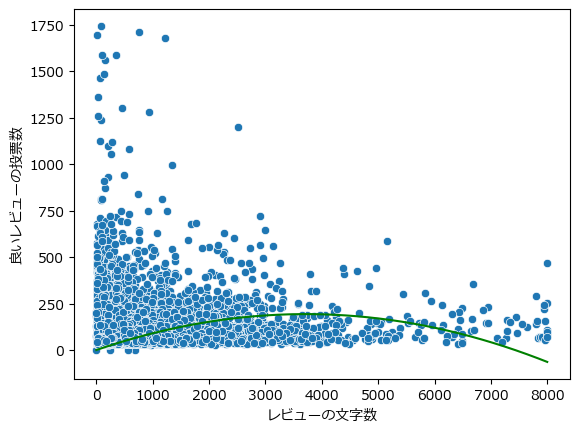

In [119]:
x = np.linspace(0,8000,200)
y_est = x*0.103985+-0.000014*x**2
sns.scatterplot(x=X["レビューの文字数"], y=y)
plt.plot(x,y_est,"g")
plt.show()

In [12]:
# 残差の計算
y_est = (result.params * X).sum(axis="columns")
resid = y - y_est

c:\Users\koyama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


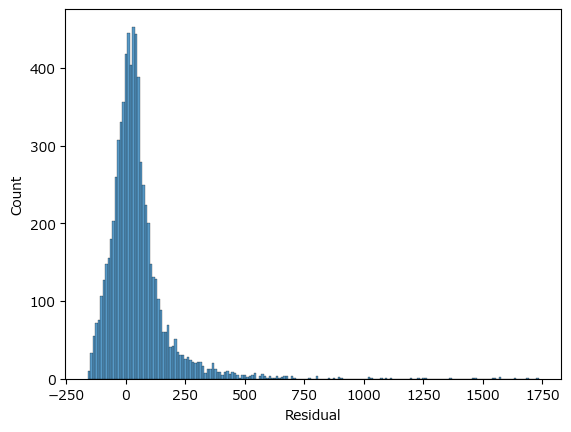

In [15]:
# 残差の評価1
# 残差のヒストグラム
sns.histplot(resid)
plt.xlabel("Residual")
plt.show()

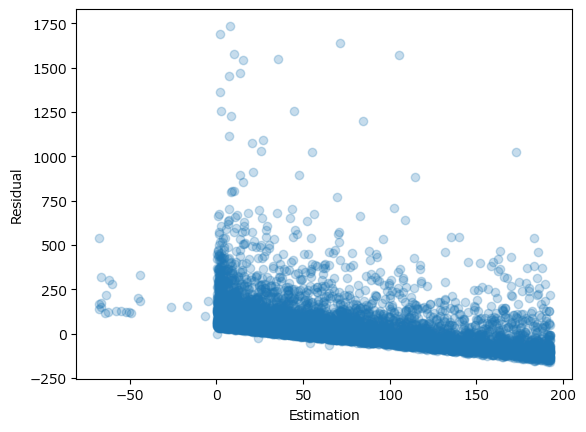

In [14]:
# 残差プロット
plt.scatter(y_est, resid, alpha=0.25)
plt.xlabel("Estimation")
plt.ylabel("Residual")
plt.show()

[]

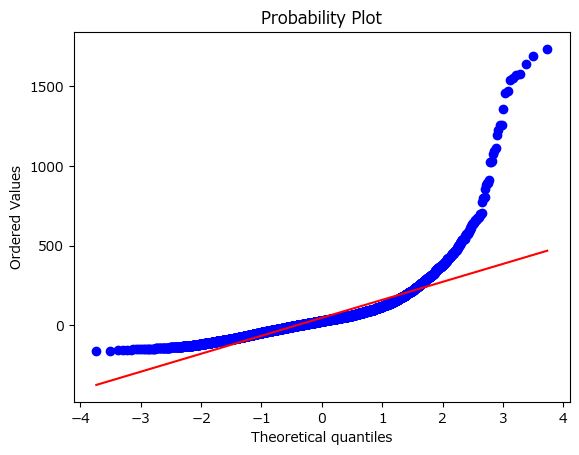

In [13]:
probplot(resid, dist="norm", plot=plt)
plt.plot()

## 対数変換

In [78]:
#対数変換
log_X=np.log(X)
log_Y=np.log(y)

c:\Users\koyama\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
log_X

,書いたレビュー総数,レビュー時点でのプレイ時間
0,0.000000,8.108623
1,3.555348,6.927558
2,0.000000,6.773080
3,2.484907,6.354370
4,2.197225,7.653020
...,...,...
7334,4.919981,7.835975
7335,5.463832,4.060443
7336,4.736198,3.931826
7337,2.833213,1.791759


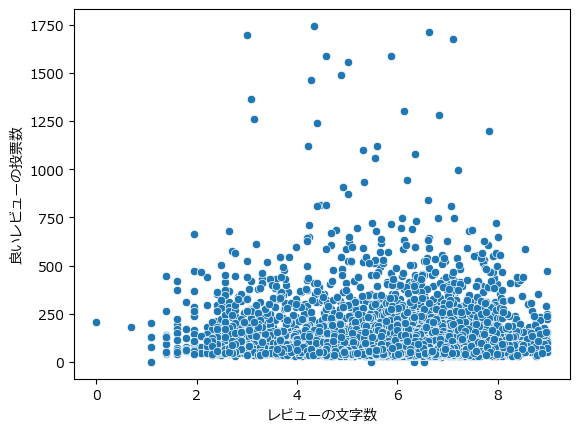

In [79]:
sns.scatterplot(x=log_X["レビューの文字数"], y=y)
plt.show()

In [121]:
model=sm.OLS(y,log_X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             良いレビューの投票数   R-squared (uncentered):                   0.441
Model:                            OLS   Adj. R-squared (uncentered):              0.441
Method:                 Least Squares   F-statistic:                              5788.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                        0.00
Time:                        14:00:29   Log-Likelihood:                         -45745.
No. Observations:                7339   AIC:                                  9.149e+04
Df Residuals:                    7338   BIC:                                  9.150e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
レビューの文字数       3.5001      0.046     76.078      0.000       3.410       3.590
レビューの文字数^2     7.0003      0.092     76.078      0.000       6.820       7.181
==============================================================================
Omnibus:                     7476.345   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           580025.595
Skew:                           4.967   Prob(JB):                         0.00
Kurtosis:                      45.404   Cond. No.                     4.62e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

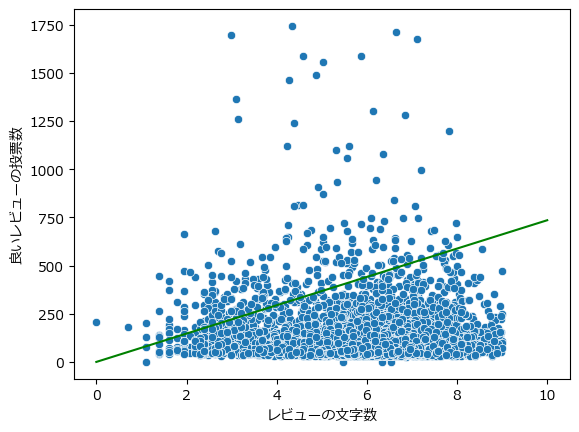

In [122]:
x = np.linspace(0,10,2)
y_est = x*3.5001+7.0003*x**2
sns.scatterplot(x=log_X["レビューの文字数"], y=y)
plt.plot(x,y_est,"g")
plt.show()

In [126]:
y_est = (result.params * log_X).sum(axis="columns")
resid = y - y_est

c:\Users\koyama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


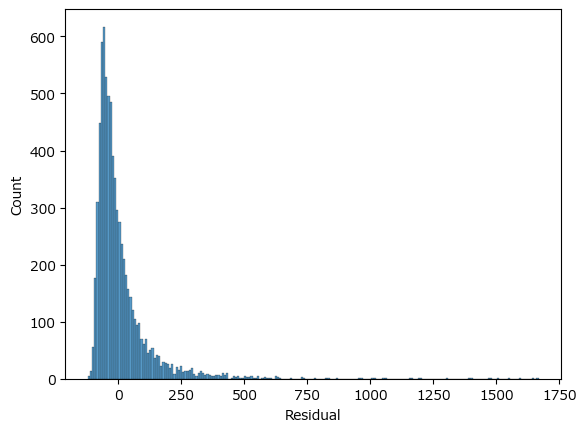

In [127]:
sns.histplot(resid)
plt.xlabel("Residual")
plt.show()

[]

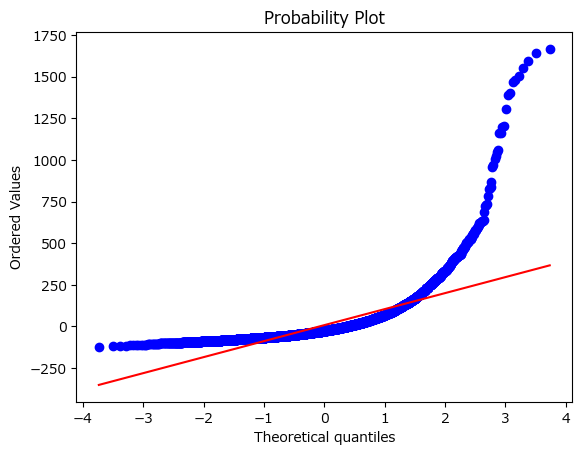

In [128]:
probplot(resid, dist="norm", plot=plt)
plt.plot()

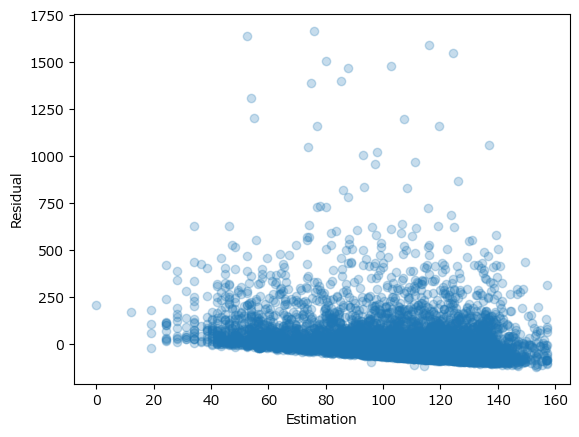

In [129]:
# 残差プロット
plt.scatter(y_est, resid, alpha=0.25)
plt.xlabel("Estimation")
plt.ylabel("Residual")
plt.show()

## レビューの文字数が1000文字以下のものに絞って分析

In [ ]:
f["レビューの文字数^2_2"]=f["レビューの文字数"]**2

In [107]:
y=f["良いレビューの投票数"]
X=f[["レビューの文字数","レビューの文字数^2_2"]]

In [108]:
X

,レビューの文字数,レビューの文字数^2_2
0,833,693889
1,30,900
2,25,625
4,159,25281
5,67,4489
...,...,...
7331,522,272484
7332,605,366025
7333,792,627264
7334,802,643204


In [109]:
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             良いレビューの投票数   R-squared (uncentered):                   0.318
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              1182.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                        0.00
Time:                        13:41:59   Log-Likelihood:                         -32272.
No. Observations:                5071   AIC:                                  6.455e+04
Df Residuals:                    5069   BIC:                                  6.456e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
レビューの文字数         0.5053      0.014     35.026      0.000       0.477       0.534
レビューの文字数^2_2    -0.0005   1.96e-05    -24.001      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     4761.278   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267855.355
Skew:                           4.422   Prob(JB):                         0.00
Kurtosis:                      37.489   Cond. No.                     2.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

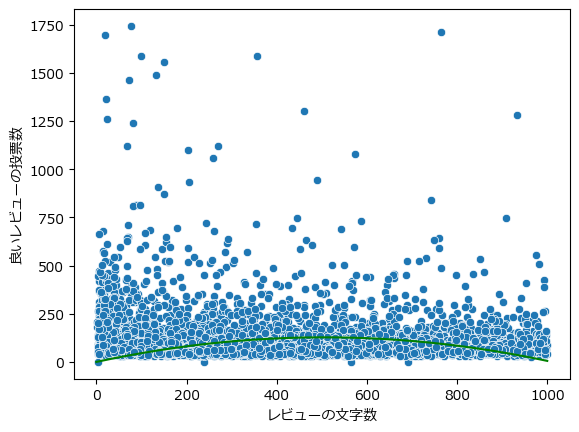

In [110]:
x = np.linspace(0,1000,200)
y_est = x*0.5053+-0.0005*x**2
sns.scatterplot(x=X["レビューの文字数"], y=y)
plt.plot(x,y_est,"g")
plt.show()